In [3]:
import torchvision.datasets as dset
import torchvision.transforms as transforms
cap = dset.CocoCaptions(root = '/data/coco/train2017',
                        annFile = '/data/coco/annotations/captions_train2017.json',
                        transform=transforms.PILToTensor())
# cap = dset.CocoCaptions(root = '/data/coco/val2017',
#                         annFile = '/data/coco/annotations/captions_val2017.json',
#                         transform=transforms.PILToTensor())

print('Number of samples: ', len(cap))
img, target = cap[3] # load 4th sample

print("Image Size: ", img.size())
print(target)

loading annotations into memory...
Done (t=0.41s)
creating index...
index created!
Number of samples:  118287
Image Size:  torch.Size([3, 425, 640])
['A zebra grazing on lush green grass in a field.', 'Zebra reaching its head down to ground where grass is. ', 'The zebra is eating grass in the sun.', 'A lone zebra grazing in some green grass.', 'a Zebra grazing on grass in a green open field.']


In [4]:
import torch.utils.data as data

# this dataloader should course an error because the annotation contains different size of data
# you should create custom collate_fn
loader = data.DataLoader(cap, batch_size=256, num_workers=16, shuffle=False)
print(loader)

for batch in loader:
    x, y = batch
    print(x.shape)
    print(y)
    break

RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/user/.local/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
  File "/home/user/.local/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 54, in fetch
    return self.collate_fn(data)
  File "/home/user/.local/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 316, in default_collate
    return collate(batch, collate_fn_map=default_collate_fn_map)
  File "/home/user/.local/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 173, in collate
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "/home/user/.local/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 173, in <listcomp>
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "/home/user/.local/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 141, in collate
    return collate_fn_map[elem_type](batch, collate_fn_map=collate_fn_map)
  File "/home/user/.local/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 212, in collate_tensor_fn
    out = elem.new(storage).resize_(len(batch), *list(elem.size()))
RuntimeError: Trying to resize storage that is not resizable


In [9]:
from src.data import CocoCaptionsDataModule

dm = CocoCaptionsDataModule(simclr=True)
print()
print('setup:')
dm.setup(stage='fit')
for batch in dm.train_dataloader():
    x, y = batch
    # print("type(Y):", type(y))
    x, y = x[0], y[0]
    print("train:")
    print("Image Size: ", x.size())
    print(type(y),type(y[0]),y)
    print(len(y), len(y[0]))
    print(y[0])
    break

# for batch in dm.val_dataloader():
#     x, y = batch
#     print("val:")
#     print("Image Size: ", x.size())
#     print(y)
#     break
print()
print('test')
dm.setup(stage='test')
test_loader = dm.test_dataloader()
test_set = test_loader.dataset
print()
print('show first one data')
for i in range(1):
    img, y = test_set[i]
    img, _, _ = img
    print("Image Size: ", img.size())
    print(type(y),type(y[0]),type(y[0][0]),y)
print(len(test_loader.dataset))
# print(test_loader)
print()
print('show next sample')
# x, y = next(iter(test_loader))
# print(x.shape, y.shape)

for batch in dm.test_dataloader():
    x, y = batch
    x, y = x[0], y[0]
    print(x.shape, len(y))
    break


setup:
loading annotations into memory...
Done (t=0.38s)
creating index...
index created!
train:
Image Size:  torch.Size([64, 3, 224, 224])
<class 'list'> <class 'str'> ['Guy in a field flying a multi-colored kite.', ' a man standing and playing with a kite  in an empty park ', 'He has complete control over the kite he is flying.', 'A man who is flying a kite in a field.', 'A person flying a kite in an open field.']
5 43
Guy in a field flying a multi-colored kite.

test
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!

show first one data
Image Size:  torch.Size([3, 224, 224])
<class 'list'> <class 'str'> <class 'str'> ['A woman stands in the dining area at the table.', 'A room with chairs, a table, and a woman in it.', 'A woman standing in a kitchen by a window', 'A person standing at a table in a room.', 'A living area with a television and a table']
5000

show next sample
torch.Size([128, 3, 224, 224]) 5


In [9]:
from src.data import CocoDetectionDataModule

dm = CocoDetectionDataModule(simclr=True)
print('setup:')
dm.prepare_data()
dm.setup(stage='fit')

setup:
loading annotations into memory...
Done (t=5.92s)
creating index...
index created!


In [10]:
import torch.utils.data as data
dataloader = data.DataLoader(dm.train_set)
for batch in dataloader:
    print(batch)
    break

[[tensor([[[[0.0549, 0.0549, 0.0471,  ..., 0.0000, 0.0000, 0.0000],
          [0.0627, 0.0549, 0.0392,  ..., 0.0000, 0.0000, 0.0000],
          [0.0627, 0.0549, 0.0471,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.2902, 0.2941, 0.2941,  ..., 0.1922, 0.1882, 0.1961],
          [0.2863, 0.2902, 0.2863,  ..., 0.2157, 0.2157, 0.2196],
          [0.2784, 0.2706, 0.2706,  ..., 0.2275, 0.2353, 0.2353]],

         [[0.0588, 0.0588, 0.0510,  ..., 0.0000, 0.0000, 0.0000],
          [0.0627, 0.0588, 0.0471,  ..., 0.0000, 0.0000, 0.0000],
          [0.0627, 0.0588, 0.0510,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.2863, 0.2941, 0.2902,  ..., 0.1882, 0.1882, 0.1961],
          [0.2784, 0.2863, 0.2824,  ..., 0.2078, 0.2078, 0.2196],
          [0.2627, 0.2627, 0.2627,  ..., 0.2235, 0.2275, 0.2314]],

         [[0.0196, 0.0196, 0.0157,  ..., 0.0000, 0.0000, 0.0000],
          [0.0196, 0.0196, 0.0157,  ..., 0.0000, 0.0000, 0.0000],
          [0.0196, 0.0196, 0.0157,  ...,

In [6]:
loader = dm.train_dataloader()
print(loader.dataset[0][1][0])

{'segmentation': [[3.39, 232.94, 25.98, 243.11, 37.27, 245.36, 58.73, 245.36, 71.15, 263.44, 75.67, 272.47, 76.8, 273.6, 97.13, 282.64, 99.39, 284.89, 109.55, 299.58, 121.98, 313.13, 120.85, 331.2, 120.85, 332.33, 126.49, 341.36, 117.46, 368.47, 105.04, 398.96, 100.52, 420.42, 82.45, 453.18, 73.52, 466.2, 63.93, 479.59, 0.35, 479.59, 0.35, 442.78, 0.13, 418.91, 0.13, 374.3, 0.13, 329.68, 0.13, 285.07, 0.13, 240.46, 0.8, 233.09]], 'area': 23492.956549999988, 'iscrowd': 0, 'image_id': 259408, 'bbox': [0.13, 232.94, 126.36, 246.65], 'category_id': 1, 'id': 473588}


In [11]:
for batch in dm.train_dataloader():
    print(batch)
    x, y = batch
    # print("type(Y):", type(y))
    x, y = x[0], y[0]
    # print("train:")
    # print("Image Size: ", x.size())
    print(type(y),type(y[0]),y)
    # print(y[0])
    break

# # for batch in dm.val_dataloader():
# #     x, y = batch
# #     print("val:")
# #     print("Image Size: ", x.size())
# #     print(y)
# #     break
# print()
# print('test')
# dm.setup(stage='test')
# test_loader = dm.test_dataloader()
# test_set = test_loader.dataset
# print()
# print('show first one data')
# for i in range(1):
#     img, y = test_set[i]
#     img, _, _ = img
#     print("Image Size: ", img.size())
#     print(type(y),type(y[0]),type(y[0][0]),y)
# print(len(test_loader.dataset))
# # print(test_loader)
# print()
# print('show next sample')
# # x, y = next(iter(test_loader))
# # print(x.shape, y.shape)

# for batch in dm.test_dataloader():
#     x, y = batch
#     x, y = x[0], y[0]
#     print(x.shape, len(y))
#     break

((tensor([[[[0.3804, 0.3176, 0.3098,  ..., 0.7294, 0.7333, 0.4196],
          [0.3608, 0.3176, 0.3216,  ..., 0.7255, 0.6706, 0.3961],
          [0.3647, 0.3294, 0.3294,  ..., 0.7216, 0.3882, 0.4824],
          ...,
          [0.0196, 0.1216, 0.0902,  ..., 0.7569, 0.7255, 0.4510],
          [0.0196, 0.0980, 0.0667,  ..., 0.7608, 0.7451, 0.4549],
          [0.0196, 0.0706, 0.0275,  ..., 0.6392, 0.5608, 0.3333]],

         [[0.3804, 0.3176, 0.3098,  ..., 0.7294, 0.7333, 0.4196],
          [0.3608, 0.3176, 0.3216,  ..., 0.7255, 0.6706, 0.3961],
          [0.3647, 0.3294, 0.3294,  ..., 0.7216, 0.3882, 0.4824],
          ...,
          [0.0196, 0.1216, 0.0902,  ..., 0.7569, 0.7255, 0.4510],
          [0.0196, 0.0980, 0.0667,  ..., 0.7608, 0.7451, 0.4549],
          [0.0196, 0.0706, 0.0275,  ..., 0.6392, 0.5608, 0.3333]],

         [[0.3804, 0.3176, 0.3098,  ..., 0.7294, 0.7333, 0.4196],
          [0.3608, 0.3176, 0.3216,  ..., 0.7255, 0.6706, 0.3961],
          [0.3647, 0.3294, 0.3294,  ...,

In [57]:
from torch.utils.data import Dataset
from typing import Optional, Tuple, Any
from torchvision import datasets
class CocoDatasetInstance(Dataset):
    def __init__(
            self,
            root="/data/coco/train2017",
            annfile="/data/coco/annotations/instances_train2017.json",
            base_transform: Optional[callable] = None,
            simclr_transform: Optional[callable] = None,
            larger_transform: Optional[callable] = None,
            smaller_transform: Optional[callable] = None,
            smallest_smaller: Optional[int] = None,
        ):
        self.cocoDetaction = datasets.CocoDetection(
            root, annfile, transform=base_transform
        )
        self.simclr_transform = simclr_transform
        self.larger_transform = larger_transform
        self.smaller_transfrom = smaller_transform
        self.smallest_smaller = smallest_smaller
    def __len__(self):
        return self.cocoDetaction.__len__()
    def __getitem__(self, index: int) -> Tuple[Any, Any]:
        image, target = self.cocoDetaction[index]
        if self.simclr_transform is not None:
            simclr = self.simclr_transform(image)
        else:
            simclr = (image, image)
        if self.larger_transform is not None:
            larger = self.larger_transform(image)
        else:
            larger = image
        smallers = [] 
        for annotation in target:
            x, y, w, h = annotation['bbox']
            if self.smallest_smaller is not None and w*h < self.smallest_smaller:
                continue
            smaller_original = image.crop((x, y, x+w, y+h))
            if self.smaller_transfrom is not None:
                smaller = self.smaller_transfrom(smaller_original)
            else:
                smaller = smaller_original
            smallers.append(smaller)
        return simclr, larger, smallers, target

In [60]:
# dataset = CocoDatasetInstance("/data/coco/train2017", "/data/coco/annotations/instances_train2017.json")
dataset = CocoDatasetInstance(smallest_smaller=2000)
dataset[0]

loading annotations into memory...
Done (t=9.11s)
creating index...
index created!


((<PIL.Image.Image image mode=RGB size=640x480>,
  <PIL.Image.Image image mode=RGB size=640x480>),
 <PIL.Image.Image image mode=RGB size=640x480>,
 [<PIL.Image.Image image mode=RGB size=612x286>,
  <PIL.Image.Image image mode=RGB size=319x229>,
  <PIL.Image.Image image mode=RGB size=316x245>,
  <PIL.Image.Image image mode=RGB size=434x375>,
  <PIL.Image.Image image mode=RGB size=76x47>,
  <PIL.Image.Image image mode=RGB size=58x47>,
  <PIL.Image.Image image mode=RGB size=84x70>,
  <PIL.Image.Image image mode=RGB size=95x72>],
 [{'segmentation': [[500.49,
     473.53,
     599.73,
     419.6,
     612.67,
     375.37,
     608.36,
     354.88,
     528.54,
     269.66,
     457.35,
     201.71,
     420.67,
     187.69,
     389.39,
     192.0,
     19.42,
     360.27,
     1.08,
     389.39,
     2.16,
     427.15,
     20.49,
     473.53]],
   'area': 120057.13925,
   'iscrowd': 0,
   'image_id': 9,
   'bbox': [1.08, 187.69, 611.59, 285.84],
   'category_id': 51,
   'id': 1038967},
  

In [61]:
all_dataset = CocoDatasetInstance()

loading annotations into memory...
Done (t=9.36s)
creating index...
index created!


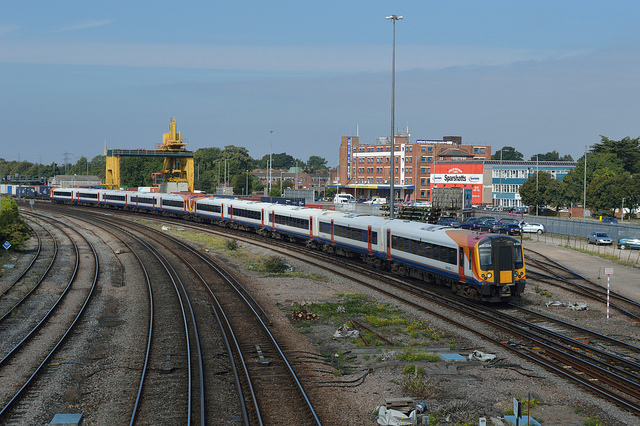

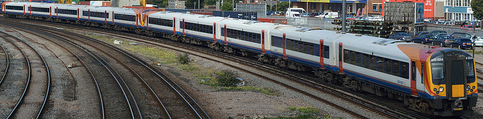

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [62]:
simclr, larger, smallers, target = all_dataset[9]
display(simclr[0])
[display(s) for s in smallers]

In [67]:
from src.data.coco_detection import CocoDetectionDataModule
dm = CocoDetectionDataModule()
print()
print('setup:')
dm.setup(stage='fit')
print('train:')
for batch in dm.train_dataloader():
    simclr, larger, smallers, y = batch
    simclr, larger, smallers, y = simclr[0], larger[0], smallers[0], y
    print(f"simclr size: {simclr[1].shape}")
    print(f"larger size: {larger.shape}")
    print(f"num of smallers: {smallers.shape}")
    print(f"type of y: {type(y)}")
    break

# # for batch in dm.val_dataloader():
# #     x, y = batch
# #     print("val:")
# #     print("Image Size: ", x.size())
# #     print(y)
# #     break
# print()
# print('test')
# dm.setup(stage='test')
# test_loader = dm.test_dataloader()
# test_set = test_loader.dataset
# print()
# print('show first one data')
# for i in range(1):
#     img, y = test_set[i]
#     img, _, _ = img
#     print("Image Size: ", img.size())
#     print(type(y),type(y[0]),type(y[0][0]),y)
# print(len(test_loader.dataset))
# # print(test_loader)
# print()
# print('show next sample')
# # x, y = next(iter(test_loader))
# # print(x.shape, y.shape)

# for batch in dm.test_dataloader():
#     x, y = batch
#     x, y = x[0], y[0]
#     print(x.shape, len(y))
#     break


setup:
loading annotations into memory...
Done (t=8.05s)
creating index...
index created!
train:


RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/user/.local/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
  File "/home/user/.local/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 54, in fetch
    return self.collate_fn(data)
  File "/work/src/data/coco_detection.py", line 116, in custom_collate_fn
    smaller_transform=self.smaller_transform,
RuntimeError: stack expects each tensor to be equal size, but got [428, 640] at entry 0 and [640, 425] at entry 1


In [4]:
import torch
# 入力例
input_tuple = (
    [torch.randn(3, 224, 224) for _ in range(5)],
    [torch.randn(3, 224, 224) for _ in range(3)],
    [torch.randn(3, 224, 224) for _ in range(7)],
)

print(f"type(input_tuple): {type(input_tuple)}")
print(f"type(input_tuple[0]): {type(input_tuple[0])}")
print(f"type(input_tuple[0][0]): {type(input_tuple[0][0])}")
print(f"input_tuple[0][0].shape: {input_tuple[0][0].shape}")
print()

# 各リストの長さを格納するリスト
len_list = [len(lst) for lst in input_tuple]

# すべてのテンソルを結合するためのリスト
all_tensors = [tensor for sublist in input_tuple for tensor in sublist]

# 結合してテンソルに変換
combined_tensor = torch.stack(all_tensors)

# 結果の出力
print("Lengths of each list:", len_list)
print("Combined tensor shape:", combined_tensor.shape)


type(input_tuple): <class 'tuple'>
type(input_tuple[0]): <class 'list'>
type(input_tuple[0][0]): <class 'torch.Tensor'>
input_tuple[0][0].shape: torch.Size([3, 224, 224])

Lengths of each list: [5, 3, 7]
Combined tensor shape: torch.Size([15, 3, 224, 224])
